# Simplest Example

In [70]:
import numpy as np

A = np.mat([
    [0,1,0,0],
    [0,0,1,1],
    [0,1,0,0],
    [1,0,1,0]
])

X= np.mat([
    [i, -i]
    for i in range(A.shape[0])
], dtype = float)

I = np.mat(np.eye(A.shape[0]))

A_hat = A + I

D = np.array(A.sum(axis=0))[0]
D = np.matrix(np.diag(D))
D_inverse = D**-1

D_hat = np.array(A_hat.sum(axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat_inverse = D_hat**-1

W = np.matrix([
    [1, -1],
    [-1, 1]
])

# print("A")
# display(A)

# print("X")
# display(X)

# print("D")
# display(D)

# print("D_inverse")
# display(D_inverse)

# print("A_hat")
# display(A_hat)

# print("D_hat")
# display(D_hat)

# print("D_hat_inverse")
# display(D_hat_inverse)


In [71]:
def relu_arr(x):
    return x * (x > 0)

In [72]:
def relu_mat(x):
    return np.maximum(x, 0)

In [73]:
relu_mat(D_hat_inverse * A_hat * X * W)

matrix([[1., 0.],
        [4., 0.],
        [2., 0.],
        [5., 0.]])

# Zachary karate Club

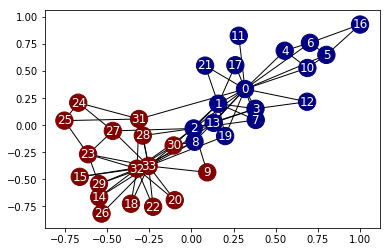

In [107]:
from networkx import karate_club_graph, to_numpy_matrix
import networkx as nx
import matplotlib.pyplot as plt
from itertools import count


zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())

A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))


groups = set(nx.get_node_attributes(zkc,'club').values())
mapping = dict(zip(sorted(groups),count()))
nodes = zkc.nodes()
colors = [mapping[zkc.node[n]['club']] for n in nodes]

pos = nx.spring_layout(zkc)

nc = nx.draw_networkx(zkc, pos, nodelist=nodes, node_color=colors, cmap=plt.cm.jet, font_color='white')

In [108]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))

W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))


In [109]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu_mat(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

output = H_2

In [110]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}

corr_count = 0
for node in zkc.nodes():
    pred_label = 'Mr. Hi' if feature_representations[node][0] < feature_representations[node][1] else 'Officer'
    true_label = zkc.node[node]['club']
    print(node, pred_label, true_label)
    if (pred_label == true_label):
        corr_count += 1

print("\nAccuracy")
print(round(corr_count/34 * 100, 2), "%")

0 Officer Mr. Hi
1 Officer Mr. Hi
2 Officer Mr. Hi
3 Officer Mr. Hi
4 Officer Mr. Hi
5 Officer Mr. Hi
6 Officer Mr. Hi
7 Officer Mr. Hi
8 Officer Mr. Hi
9 Officer Officer
10 Officer Mr. Hi
11 Officer Mr. Hi
12 Officer Mr. Hi
13 Officer Mr. Hi
14 Officer Officer
15 Officer Officer
16 Officer Mr. Hi
17 Officer Mr. Hi
18 Officer Officer
19 Officer Mr. Hi
20 Officer Officer
21 Officer Mr. Hi
22 Officer Officer
23 Officer Officer
24 Officer Officer
25 Officer Officer
26 Officer Officer
27 Officer Officer
28 Officer Officer
29 Officer Officer
30 Officer Officer
31 Officer Officer
32 Officer Officer
33 Officer Officer

Accuracy
50.0 %
